In [1]:
from pathlib import Path
import os
import matplotlib.pyplot as plt
from src.exp_cleaner import open_all_xps_files, fill_spectral_data
from src.utils import create_uniform_energy_grid
import json

In [2]:
data_path = Path("../data/experimental_data")
polymers = os.listdir(data_path) # Use the first 106 polymers
unknown_copolymers = ['poly(ethylene-co-maleic anhydride) (PECMA)', 'poly(styrene-co-maleic anhydride) (PSCMA)' ]

# Remove copolymers with unkown quantities from the polymers list
polymers = [p for p in polymers if p not in unknown_copolymers]


# Load the data
spectral_data, label_data, ids, be_data, SMILES_data = open_all_xps_files(data_path=data_path, elements=polymers)

Material ID: poly(ether ether ketone) (PEEK)
Material ID: poly(vinyl methyl ether) (PVME)
Material ID: poly(4-hydroxystyrene) (PHS)
Material ID: poly(ethyl methacrylate) (PEMA)
Material ID: poly(methyl methacrylate) (PMMA)
Material ID: poly(trans-isoprene) (PtI)
Material ID: poly(glycolide) (PG)
Material ID: Ethylcellulose (ECEL)
Material ID: poly(allylamine hydrochloride) (PAAMC)
Material ID: poly(trifluoroethyl acrylate) (PTFEA)
Material ID: poly(lauryl methacrylate) (PLMA)
Material ID: poly(vinyl ethyl ether) (PVEE)
Material ID: Nylon 6,6 (N66)
Material ID: p-Quaterphenyl [poly(phenylene) oligomer]
Material ID: poly(d,l-lactide) (PL)
Material ID: poly(ethylene sulphide) (PETHS)
Material ID: poly(diallyl isophthalate) (PDAiP)
Material ID: poly(vinyl acetate) (PVAc)
Material ID: poly(methacrylamide) (PMAM)
Material ID: poly(propylene glycol) (PPG)
Material ID: poly(chloroprene) (PCP)
Material ID: poly(4-methyl-1-pentene) (PMP)
Material ID: poly(vinylidine chloride) (PVdC)
Material ID:

In [4]:
start_energy = 0  # Define your start energy
end_energy = 700  # Define your end energy
increment = 0.1  # Define your energy increment

# Fill gaps in the spectral data
filled_spectral_data = fill_spectral_data(
    cps_data= spectral_data,  # CPS dictionary
    be_data=be_data,   # BE dictionary
    start_energy=start_energy,
    end_energy=end_energy,
    increment=increment
)


example name: poly(methyl methacrylate) (PMMA)
ester (aliphatic)


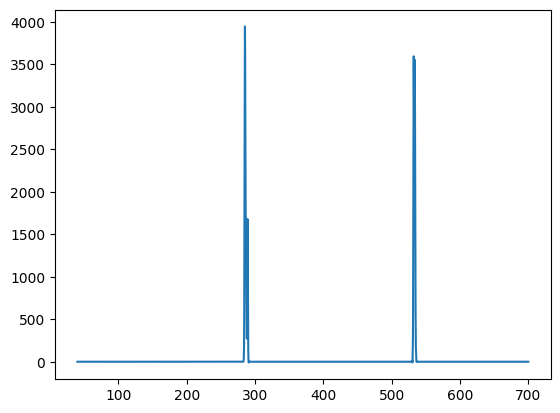

In [13]:
i = 4
example = ids[i]
print(f'example name: {example}')

example_spectra = filled_spectral_data[example]
core_example_spectra =example_spectra[400:]
example_label = label_data[example]


with open("../data/FG_list.json", "r") as f:
    FG_list = json.load(f)

for n, fg in enumerate(example_label):
    if fg == 1:
        print(FG_list[n])

start_energy = 40
end_energy = 700
BE_values = create_uniform_energy_grid(start_energy, end_energy)

plt.plot(BE_values, core_example_spectra)

/tmp/ipykernel_1363803/213040166.py:174: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0.05, 0.05, 0.98, 0.92]) # May need slight adjustments to rect


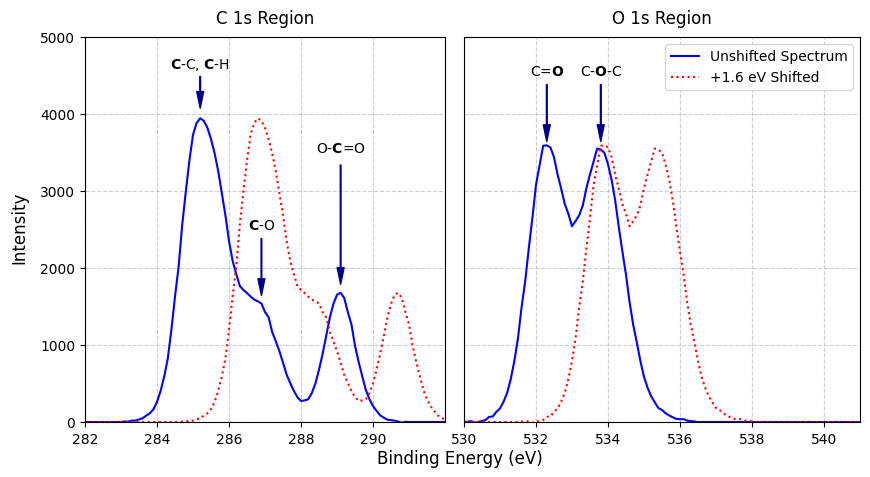

In [58]:
import numpy as np

polymer_name = 'poly(methyl methacrylate) (PMMA)'
example_spectrum = core_example_spectra
BE_axis_full = BE_values
shift_amount = 1.6

annotations_to_add = {
    "C 1s Region": [
        {
            "text": r'$\mathbf{C}$-C, $\mathbf{C}$-H',
            "xy": (285.2, 4050), # Arrow tip (x,y) on the data
            "xytext": (285.2, 4600)   # Text position (x,y)
        },
        {
            "text": r'$\mathbf{C}$-O',
            "xy": (286.9, 1600),
            "xytext": (286.9, 2500)
        },
        {
            "text": r'O-$\mathbf{C}$=O',
            "xy": (289.1, 1700),
            "xytext": (289.1, 3500)
        }
    ],
    "O 1s Region": [
        {
            "text": r'C=$\mathbf{O}$',
            "xy": (532.3, 3600),
            "xytext": (532.3, 4500)
        },
        {
            "text": r'C-$\mathbf{O}$-C',
            "xy": (533.8, 3600),
            "xytext": (533.8, 4500)
        }
    ]
}
# <<< NEW SECTION END >>>

# --- Configuration for Zoom Regions ---
# Define ALL potential regions of interest and their titles for PEEK
all_regions = [
    (282, 292),   # Region 1: C 1s region 
    (396, 403),   # Region 2: O 1s region
    (530, 541)      # Region 3: Full Survey (Example)
]


all_region_titles = ["C 1s Region", "N 1s Region", "O 1s Region"]
include_region_1 = True
include_region_2 = False
include_region_3 = True # Set to True if you want the full survey plot as well
include_flags = [include_region_1, include_region_2, include_region_3]

# --- Tick Interval Configuration ---
x_tick_interval = 2.0 # Set desired interval (e.g., ticks every 2 eV) - adjust as needed

# --- Filter regions based on flags ---
active_regions = []
active_region_titles = []
active_widths = []
if len(all_regions) != len(all_region_titles) or len(all_regions) != len(include_flags):
    raise ValueError("Mismatch in length between regions, titles, and flags!")
for i, include in enumerate(include_flags):
    if include:
        region = all_regions[i]
        active_regions.append(region)
        active_region_titles.append(all_region_titles[i])
        active_widths.append(region[1] - region[0])
if not active_regions:
    print("No regions selected for plotting. Exiting.")
    exit() # Or handle appropriately
num_active_regions = len(active_regions)

# --- Plotting Setup (Uses filtered lists) ---
fig = plt.figure(figsize=(5 * num_active_regions, 5)) # Adjust figsize as needed
gs = fig.add_gridspec(1, num_active_regions, width_ratios=active_widths, wspace=0.05)
axes = []
for i in range(num_active_regions):
    share_y_ax = axes[0] if i > 0 else None
    ax = fig.add_subplot(gs[i], sharey=share_y_ax)
    axes.append(ax)

# --- Plotting Data on Each Active Axis ---
for i, ax in enumerate(axes):
    # Plot the simple PEEK spectrum
    # <<< MODIFIED SECTION START >>>
    # 🎯 2. Plot both spectra and add labels for the legend
    # The 'if i == 0' ensures the label is only created once for the legend
    ax.plot(BE_axis_full, example_spectrum, color="blue", linewidth=1.5,
            label='Unshifted Spectrum' if i == 1 else "")

    # Plot the shifted spectrum
    ax.plot(BE_axis_full + shift_amount, example_spectrum, color="red", linestyle=':',
            label=f'+{shift_amount} eV Shifted' if i == 1 else "")
    # <<< MODIFIED SECTION END >>>

    # <<< NEW SECTION START >>>
    # 🎯 2. Check if the current plot has annotations defined and add them.
    current_title = active_region_titles[i]
    if current_title in annotations_to_add:
        # Loop through each annotation defined for this region
        for annotation in annotations_to_add[current_title]:
            ax.annotate(
                text=annotation["text"],
                xy=annotation["xy"],
                xytext=annotation["xytext"],
                arrowprops=dict(facecolor='darkblue', edgecolor='darkblue', shrink=0.05, width=0.5, headwidth=5),
                fontsize=10,
                ha='center' # Horizontal alignment
            )
    # <<< NEW SECTION END >>>

    # Set the x-axis limits for the current ACTIVE region
    ax.set_xlim(*active_regions[i])

    # --- Calculate and Set Consistent Ticks ---
    xmin, xmax = ax.get_xlim()
    # Calculate the first tick >= xmin at the interval step
    start_tick = np.ceil(xmin / x_tick_interval) * x_tick_interval
    # Calculate the last tick <= xmax at the interval step
    end_tick = np.floor(xmax / x_tick_interval) * x_tick_interval

    # Generate ticks, handle cases where range is small or doesn't contain interval steps
    if start_tick > end_tick + 1e-6: # Add small epsilon for float comparison
        calculated_ticks = ax.get_xticks() # Keep default ticks if range is smaller than interval
        print(f"Warning: Region {i+1} ({xmin:.1f}-{xmax:.1f}) is smaller than tick interval {x_tick_interval}. Using default ticks.")
    elif np.isclose(start_tick, end_tick) and xmax-xmin > 0: # Avoid single tick if range has width
         calculated_ticks = np.array([start_tick]) if start_tick >= xmin and start_tick <= xmax else ax.get_xticks() # Use default if single tick outside range
    elif xmax-xmin == 0: # Handle zero width case
        calculated_ticks = [xmin]
    else:
        # Generate ticks within the calculated range
        calculated_ticks = np.arange(start_tick, end_tick + x_tick_interval * 0.1, x_tick_interval)
        # Ensure ticks are within the actual plot limits
        calculated_ticks = calculated_ticks[(calculated_ticks >= xmin) & (calculated_ticks <= xmax)]
    



    # --- Conditionally Remove Last Tick from First Axis if needed ---
   # --- !! Conditionally Remove Last Tick from First Axis !! ---
    if i == 0 and num_active_regions > 1 and len(calculated_ticks) > 1:
        final_ticks = calculated_ticks[:-1] # Remove the last calculated tick for ax1
    else:
        final_ticks = calculated_ticks # Use all calculated ticks for other axes

    ax.set_xticks(final_ticks) # Apply the calculated (and potentially trimmed) ticks

    # --- Apply Grid (Now based on consistent ticks) ---
    ax.grid(True, linestyle='--', alpha=0.6)

    # Set individual region titles
    ax.set_title(active_region_titles[i], pad=10, fontsize=12)

    # Customize y-ticks for non-first plots
    if i > 0:
        ax.tick_params(left=False, labelleft=False)
    
    

axes[1].legend()


# --- Add Overall Figure Elements ---=
fig.supxlabel("Binding Energy (eV)", fontsize=12, y=0.02)

# --- !! Adjust Y-axis Super Label Position !! ---
# Decrease the 'x' value to move it left, closer to the axis
fig.supylabel("Intensity", fontsize=12, x=0.05) # Adjust x (e.g., 0.02, 0.01)

# Adjust layout
plt.tight_layout(rect=[0.05, 0.05, 0.98, 0.92]) # May need slight adjustments to rect
plt.grid(True)
plt.ylim(0,5000)

plt.savefig('shift_effect.svg')
plt.show()

In [36]:
import json
# Assuming 'ids', 'label_data', and 'FG_list' are already loaded as in your script

# 1. Initialize a dictionary with each FG name as a key and an empty list as its value
polymers_by_fg = {fg_name: [] for fg_name in FG_list}

# 2. Iterate through each polymer ID
for polymer_id in ids:
    # Get the label (the list of 40 FG counts) for the current polymer
    label = label_data[polymer_id]
    
    # 3. Iterate through the counts in the label, keeping track of the index
    # The index corresponds to the position in your FG_list
    for index, count in enumerate(label):
        # 4. If the count for an FG is positive (meaning it's present)
        if count > 0:
            # Get the name of the functional group using the index
            fg_name = FG_list[index]
            # Add the current polymer's ID to the list for that FG
            polymers_by_fg[fg_name].append(polymer_id)

# Now you have a complete dictionary. You can inspect it.
# For example, to see all polymers with a 'Carboxylic Acid' group (if that's in your list):
# print(polymers_by_fg['Carboxylic Acid'])



alcohol (aromatic)
['poly(4-hydroxystyrene) (PHS)']


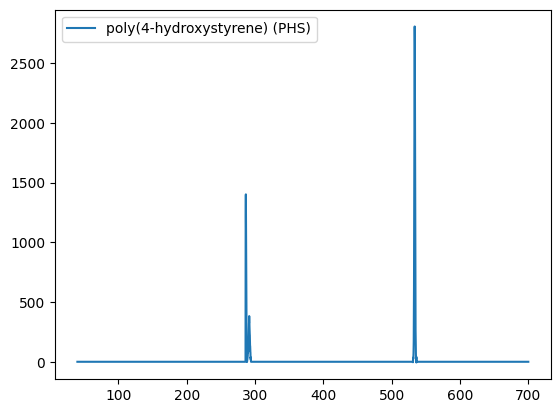

In [110]:
fg_index = 5


fg = list(polymers_by_fg.keys())[fg_index]
print(fg)

polymers_of_interest = polymers_by_fg[fg]
print(polymers_of_interest)


for polymer in polymers_of_interest:
    whole_spectra = filled_spectral_data[polymer]
    core_spectra =whole_spectra[400:]
    plt.plot(BE_values, core_spectra, label=polymer)



plt.xlim()
plt.ylim() 
plt.legend()

plt.show()

In [36]:
print(polymers_by_fg['alkyl halide (Cl)'])

NameError: name 'polymers_by_fg' is not defined

## Inactive FGs in all labels:

In [70]:
all_fgs = polymers_by_fg.keys()

for fg in all_fgs:
    if polymers_by_fg[fg] == []:
        print(fg)

alkyne
alkyl halide (Br)
alkyl halide (I)
thiol
aldehyde
nitrite
acid chloride
azide
alkane
